# Sentiment Analysis of a Netflix Film
# Movie Name : All The Bright Places
All the Bright Places is a 2020 American romantic drama film, directed by Brett Haley, from a screenplay by Jennifer Niven and Liz Hannah, based upon the novel of the same name by Niven. It stars Elle Fanning, Justice Smith, Alexandra Shipp, Kelli O'Hara, Lamar Johnson, Virginia Gardner, Felix Mallard, Sofia Hasmik, Keegan-Michael Key and Luke Wilson.

It was released on February 28, 2020, by Netflix.

In this project I have scraped tweets with hashtag #AlltheBrightPlaces and processed the text using Natural Language Toolkit after which the tweets were catogarized into positive reviews and negative reviews using TestBlob . Finally using some visualization I have calculated and visualized the Audience Score for the movie. 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
from twitterscraper import query_tweets 
import datetime as dt

In [11]:
begin_date = dt.date(2020,2,27)
end_date = dt.date(2020,2,29)
lang = 'english'
limit = 10000

In [12]:
tweets = query_tweets("#AlltheBrightPlaces", begindate = begin_date, enddate=end_date, limit=limit, lang=lang)

INFO: queries: ['#AlltheBrightPlaces since:2020-02-27 until:2020-02-28', '#AlltheBrightPlaces since:2020-02-28 until:2020-02-29']
INFO: Got 58 tweets (58 new).
INFO: Got 1197 tweets (1139 new).


In [13]:
df = pd.DataFrame(i.__dict__ for i in tweets)

In [14]:
df.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,PindolDBorbolet,𝐋 𝐮 𝐜 𝐚 𝐒 𝐈 𝐥 𝐯 𝐚 🦋,2682972105,1233178448094547968,/PindolDBorbolet/status/1233178448094547968,2020-02-27 23:53:48,1582847628,Eu amanhã ocupadíssimo o dia todo. \n\n@Netfli...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,[https://pbs.twimg.com/media/ER0hQU-UcAEEYSg.jpg],,0,2,0,False,False,,[]
1,bcuzisaidso49,Lauren,66003728,1233176734503186440,/bcuzisaidso49/status/1233176734503186440,2020-02-27 23:46:59,1582847219,These last 2 weeks @netflix has been pretty sp...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,0,0,0,False,False,,[]
2,alxsdzn,≡ Alexis,725647838743425024,1233174281325969408,/alxsdzn/status/1233174281325969408,2020-02-27 23:37:14,1582846634,Napakatagal naman ng All The Bright Places!!!!...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,0,0,0,False,False,,[]
3,BeashelWrites,Amy Beashel,153788367,1233173994112798720,/BeashelWrites/status/1233173994112798720,2020-02-27 23:36:06,1582846566,Waaaaaaaaaaaaaahhhhhhhhhh!\n\n#allthebrightpla...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://twitter.com/jenniferniven/status/1233...,...,False,[],,0,0,0,False,False,,[]
4,hiyaitselia,E L I A,3424833328,1233173469799604224,/hiyaitselia/status/1233173469799604224,2020-02-27 23:34:01,1582846441,"So live update rn, I finished reading #AlltheB...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,1,0,0,False,False,,[]


In [15]:
df.shape

(1197, 21)

In [16]:
df.to_csv('tweets.csv')

In [154]:
user_tweets = pd.read_csv('tweets.csv')
user_tweets = user_tweets.filter(['text'], axis=1)

In [155]:
df = user_tweets

In [156]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

In [157]:
#Remove Punchuations!!
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df["no_punch"] = df["text"].apply(lambda text: remove_punctuation(text))

In [158]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [159]:
#Removing Stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["no_stopwords"] = df["no_punch"].apply(lambda text: remove_stopwords(text))

In [160]:
#Removing repeating words
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["final"] = df["no_stopwords"].apply(lambda text: remove_freqwords(text))


In [161]:
tweets = df.filter(['final'],axis=1)

In [162]:
tweets

,final
0,Eu amanhã ocupadíssimo dia todo NetflixBrasil ...
1,These last 2 weeks netflix pretty spot comes n...
2,Napakatagal naman ng All The Bright Places Exc...
3,Waaaaaaaaaaaaaahhhhhhhhhh allthebrightplaces a...
4,So live update rn finished reading AlltheBrigh...
...,...
1192,«La gran Anna Faris dijo en una ocasión el sec...
1193,Sometimes person need Needs AlltheBrightPlaces
1194,PSA AlltheBrightPlaces pictwittercom4D6Abpro2O
1195,Watch ElleFanning standup4justice share prepar...


In [163]:
#Identifying sentiment of the text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

sentiments_using_textblob = tweets.final.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,final
pos,1082
neg,115


In [164]:
tweets['sentiment'] = sentiments_using_SIA

In [165]:
tweets['sentiment'].value_counts()

pos    970
neg    227
Name: sentiment, dtype: int64

In [166]:
c=0
for i in range(len(tweets['final'])):
    if 'cried' in tweets['final'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'sad' in tweets['final'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'cry' in tweets['final'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'crying' in tweets['final'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'love' in tweets['final'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'loved' in tweets['final'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1

In [167]:
import dtale
d=dtale.show(tweets)
d

In [168]:
tweets['sentiment'].value_counts()

pos    1042
neg     155
Name: sentiment, dtype: int64

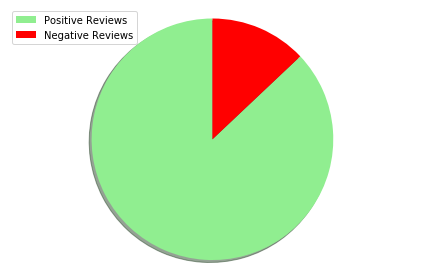

In [171]:
labels = ['Positive Reviews', 'Negative Reviews']
sizes = [1042,155]
colors = ['lightgreen', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

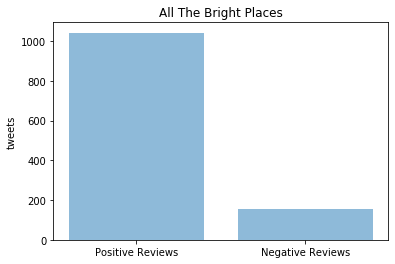

In [173]:
objects = ['Positive Reviews', 'Negative Reviews']
y_pos = np.arange(len(objects))
performance = [1042,155]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('tweets')
plt.title('All The Bright Places')

plt.show()

In [181]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 1042/1197*100 ,
    title = {'text': "Audience Score"},
    gauge = {'axis': {'range': [None, 100]}},
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()